## Лабораторная работа 5: Древовидные модели

# Инициализация проекта

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

rand_state = 1000

data_regression = pd.read_csv('./data/pred_data_lab_3.csv')
del data_regression[data_regression.columns [0]]
data_regression

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,0,1,59.8,61.0,326,3.89,3.84,2.31
2,0.29,3,1,2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,1,2,0,63.3,58.0,335,4.34,4.35,2.75
4,0.24,2,2,4,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
45869,0.72,4,6,1,60.8,57.0,2757,5.75,5.76,3.50
45870,0.72,1,6,1,63.1,55.0,2757,5.69,5.75,3.61
45871,0.70,2,6,1,62.8,60.0,2757,5.66,5.68,3.56
45872,0.86,3,3,0,61.0,58.0,2757,6.15,6.12,3.74


In [23]:
data_classification = pd.read_csv('./data/pred_data_lab_4.csv')
del data_classification[data_classification.columns [0]]
data_classification

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,True,True,False,False,False
1,10.829943,0.175592,1.294219,True,False,False,False,False
2,5.091079,0.805153,0.427715,True,False,False,True,False
3,2.247564,5.600044,0.362663,True,True,False,True,False
4,44.190936,0.566486,2.222767,True,True,False,True,False
...,...,...,...,...,...,...,...,...
860314,2.207101,0.112651,1.626798,True,True,False,False,False
860315,19.872726,2.683904,2.778303,True,True,False,False,False
860316,2.914857,1.472687,0.218075,True,True,False,True,False
860317,4.258729,0.242023,0.475822,True,False,False,True,False


# Задача 1

###  DTs Classification с Sklearn

<Axes: >

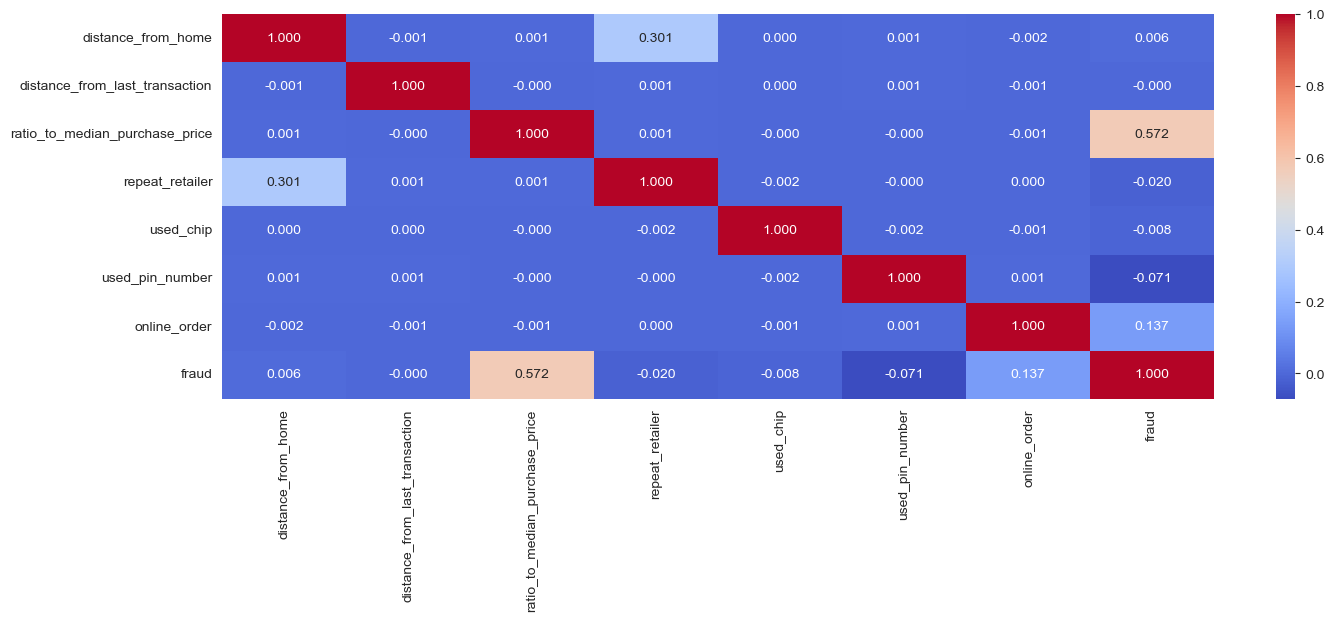

In [24]:
plt.figure(figsize = (16,5))
sns.heatmap(data_classification.corr(),annot=True,cmap="coolwarm",fmt=".3f")

C:\Users\Capybaras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Capybaras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Capybaras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Capybaras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

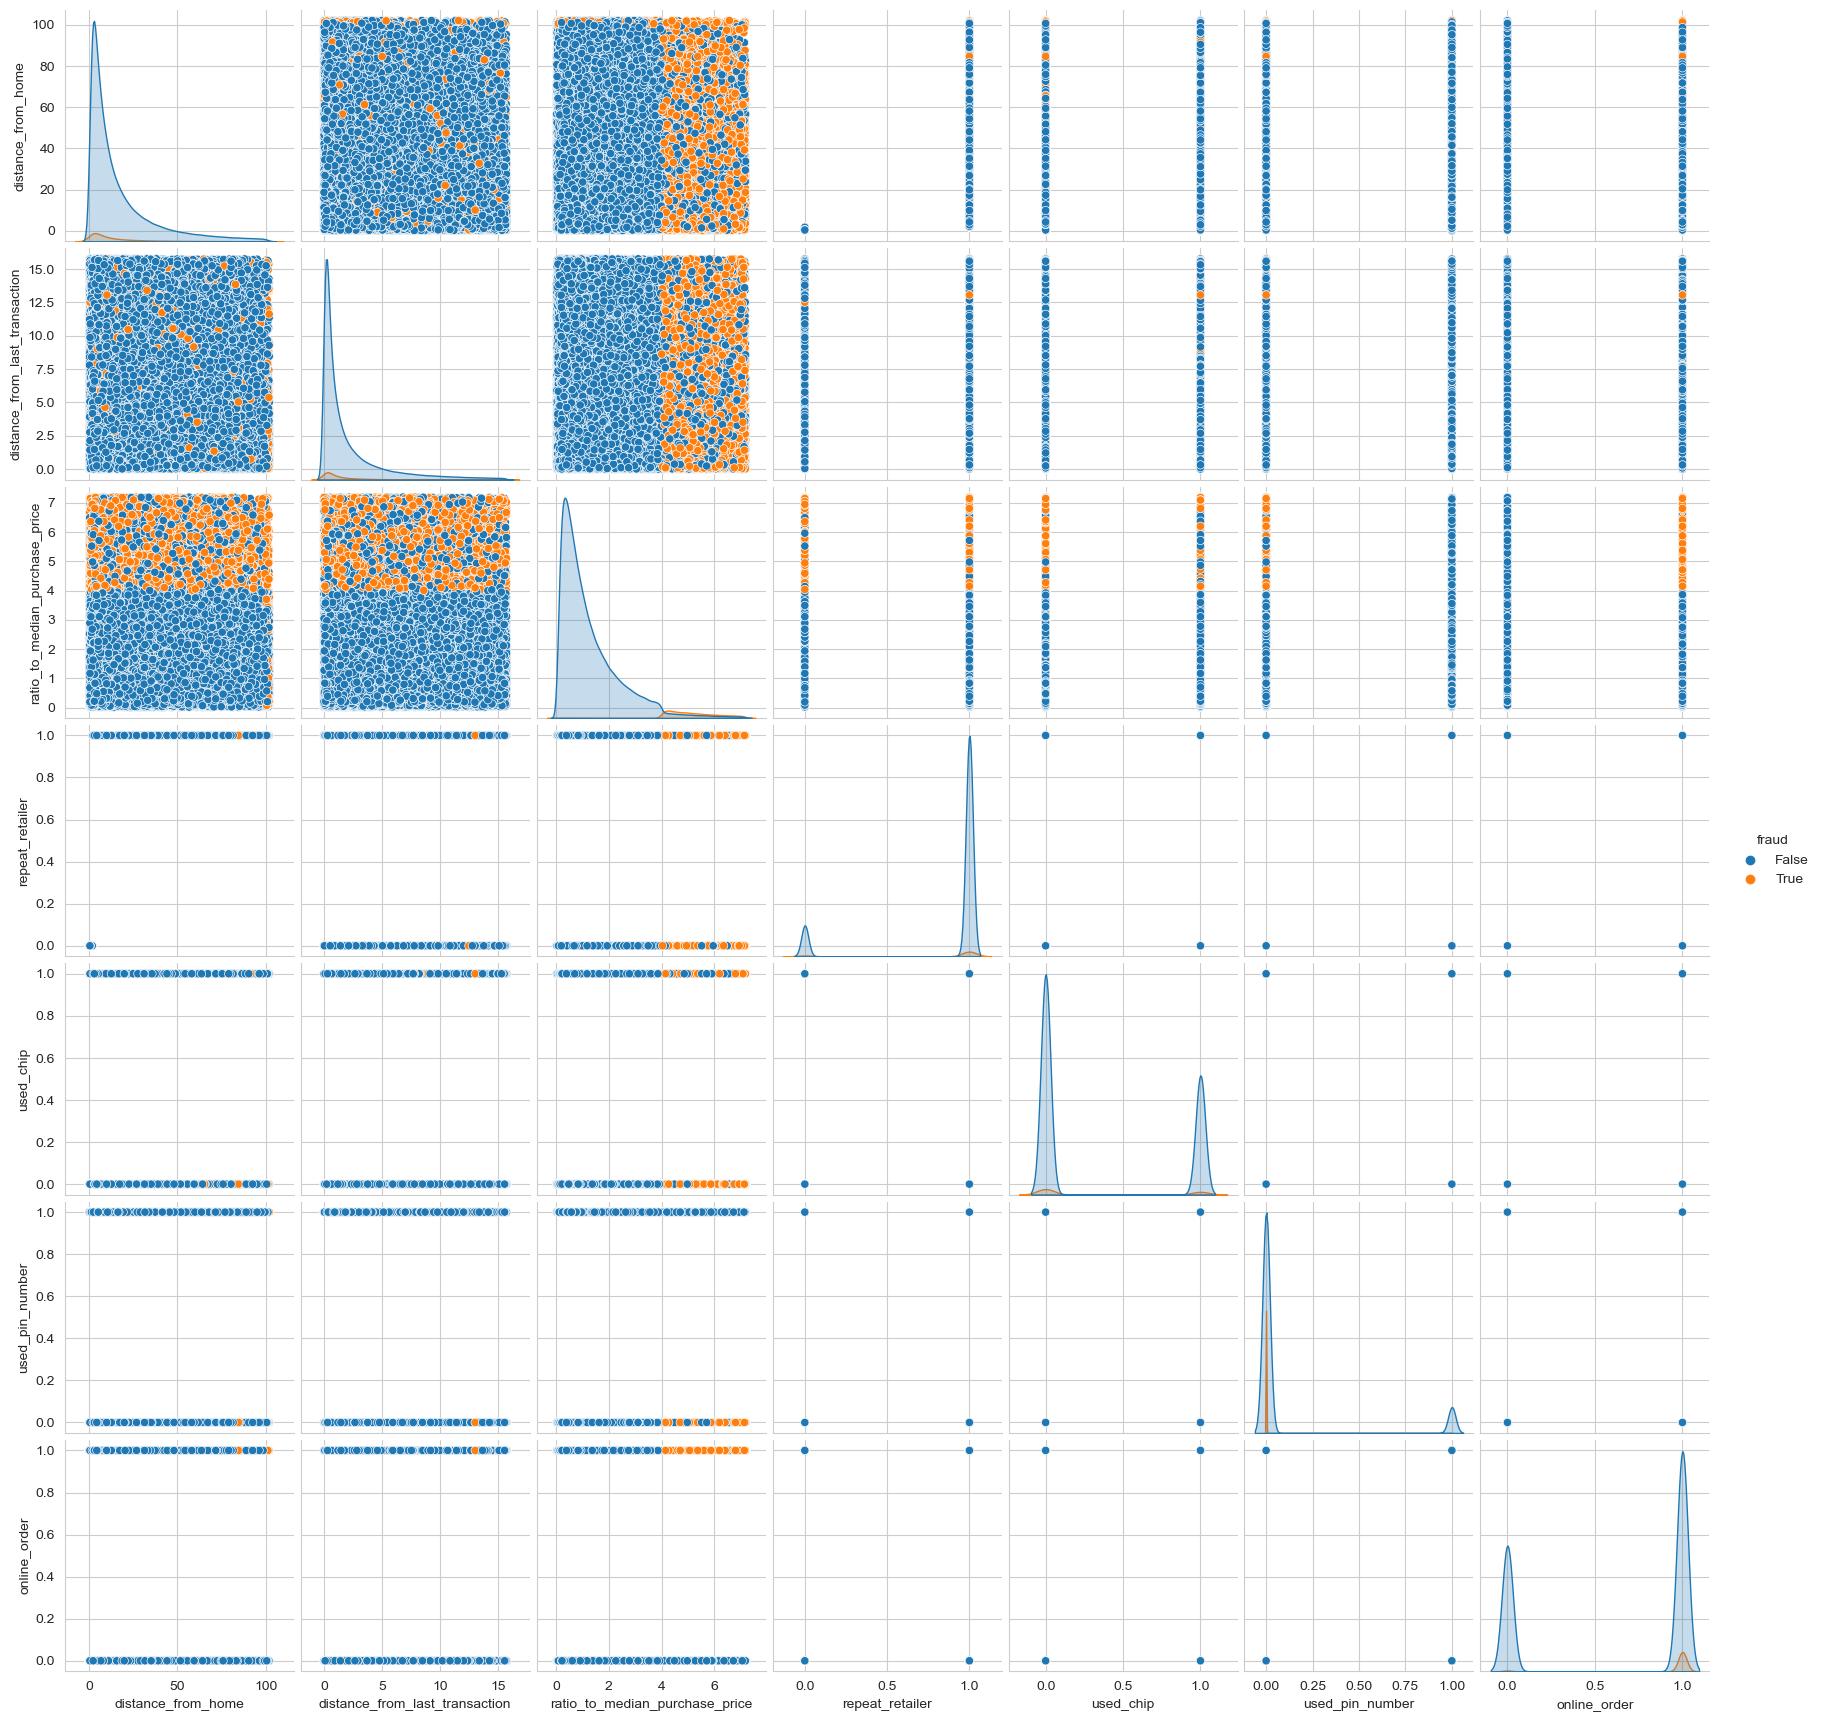

In [25]:
sns.set_style('whitegrid')
sns.pairplot(data_classification, hue= 'fraud')
plt.show()

In [26]:
y_clas = data_classification['fraud']
X_clas = data_classification.drop('fraud', axis=1)

from sklearn.model_selection import train_test_split
X_clas_train, X_clas_test, y_clas_train, y_clas_test = train_test_split(X_clas, y_clas, test_size=0.2, random_state=rand_state)

In [27]:
X_clas_train.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
717044,5.488925,0.205627,0.625526,True,True,False,True
204371,101.976305,0.531642,0.405314,True,True,False,True
672403,4.321879,0.184242,0.686582,True,True,False,False
233588,10.800398,6.390702,0.832101,True,True,False,True
724442,7.242819,0.671617,1.004407,True,False,False,True


In [28]:
from sklearn.tree import DecisionTreeClassifier

Tree_classifier = DecisionTreeClassifier()
Tree_classifier.fit(X_clas_train, y_clas_train)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


DecisionTreeClassifier()

In [29]:
Tree_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [30]:
Tree_classifier.get_depth()

5

In [31]:
# Прогнозирование классов тестового набора
y_clas_hat = Tree_classifier.predict(X_clas_test)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


## Метрики

In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Confusion matrix
print(confusion_matrix(y_clas_test, y_clas_hat))

[[164666      0]
 [     2   7396]]


In [33]:
# Classification report
print(classification_report(y_clas_test, y_clas_hat))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    164666
        True       1.00      1.00      1.00      7398

    accuracy                           1.00    172064
   macro avg       1.00      1.00      1.00    172064
weighted avg       1.00      1.00      1.00    172064


# Подбор гиперпараметра

In [34]:
path = DecisionTreeClassifier().cost_complexity_pruning_path(X_clas_train,y_clas_train)
ccp_alphas = path.ccp_alphas

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [35]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

accuracy_cv =[]
for alpha in ccp_alphas:
    accuracy = cross_val_score(estimator = DecisionTreeClassifier(ccp_alpha=alpha), X = X_clas_train, y = y_clas_train, cv = 5 , scoring="accuracy" )
    accuracy_cv.append(np.mean(accuracy))

output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['accuracy_CV']=accuracy_cv

output.head()

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

,alpha,accuracy_CV
0,0.000000,0.999991
1,0.000001,0.999991
2,0.000003,0.999990
3,0.000017,0.999988
4,0.000070,0.999958


C:\Users\Capybaras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Capybaras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Capybaras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Capybaras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

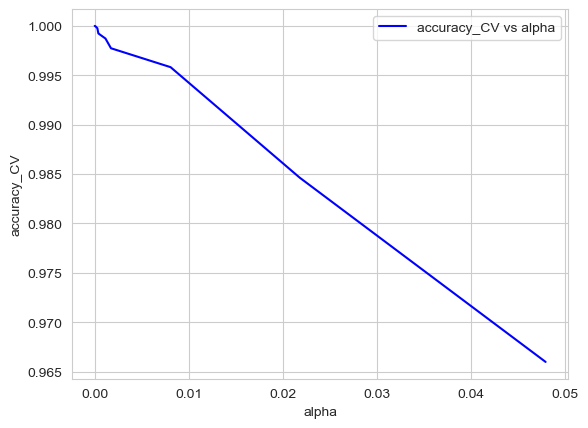

In [36]:
sns.lineplot(x='alpha', y='accuracy_CV', data=output , color='b', label="accuracy_CV vs alpha")
plt.show()

In [37]:
output.iloc[np.argmax(output['accuracy_CV']),]

alpha          0.000000
accuracy_CV    0.999991
Name: 0, dtype: float64

In [38]:
optimal_alpha = output.iloc[np.argmax(output['accuracy_CV']),0]
optimal_alpha

0.0

In [39]:
optimal_DT = DecisionTreeClassifier(ccp_alpha=optimal_alpha)
optimal_DT.fit(X_clas_train, y_clas_train)
y_hat_opt = optimal_DT.predict(X_clas_test)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

In [40]:
print(confusion_matrix(y_clas_test, y_hat_opt))

[[164666      0]
 [     2   7396]]


In [41]:
print(classification_report(y_clas_test, y_hat_opt))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    164666
        True       1.00      1.00      1.00      7398

    accuracy                           1.00    172064
   macro avg       1.00      1.00      1.00    172064
weighted avg       1.00      1.00      1.00    172064


In [42]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = optimal_DT, X = X_clas_train, y = y_clas_train, cv = 5 , scoring="accuracy" )
accuracy

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

array([1.        , 1.        , 1.        , 0.99997094, 0.99997821])

In [43]:
round(accuracy.mean(),3)

1.0

## Визуализация Tree

In [44]:
data_classification.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

C:\Users\Capybaras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Capybaras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Capybaras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Capybaras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

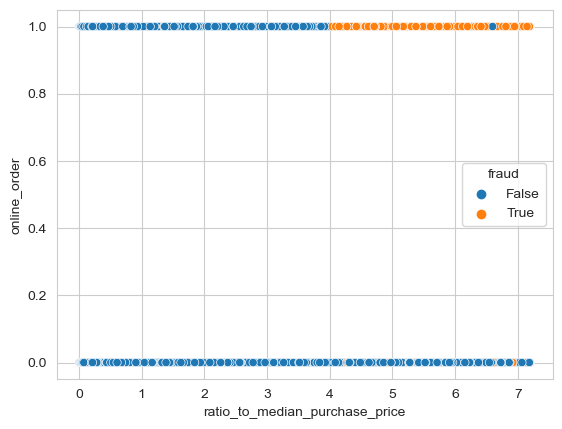

In [45]:
sns.scatterplot(x='ratio_to_median_purchase_price', y='online_order', data=data_classification, hue='fraud')
plt.show()

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

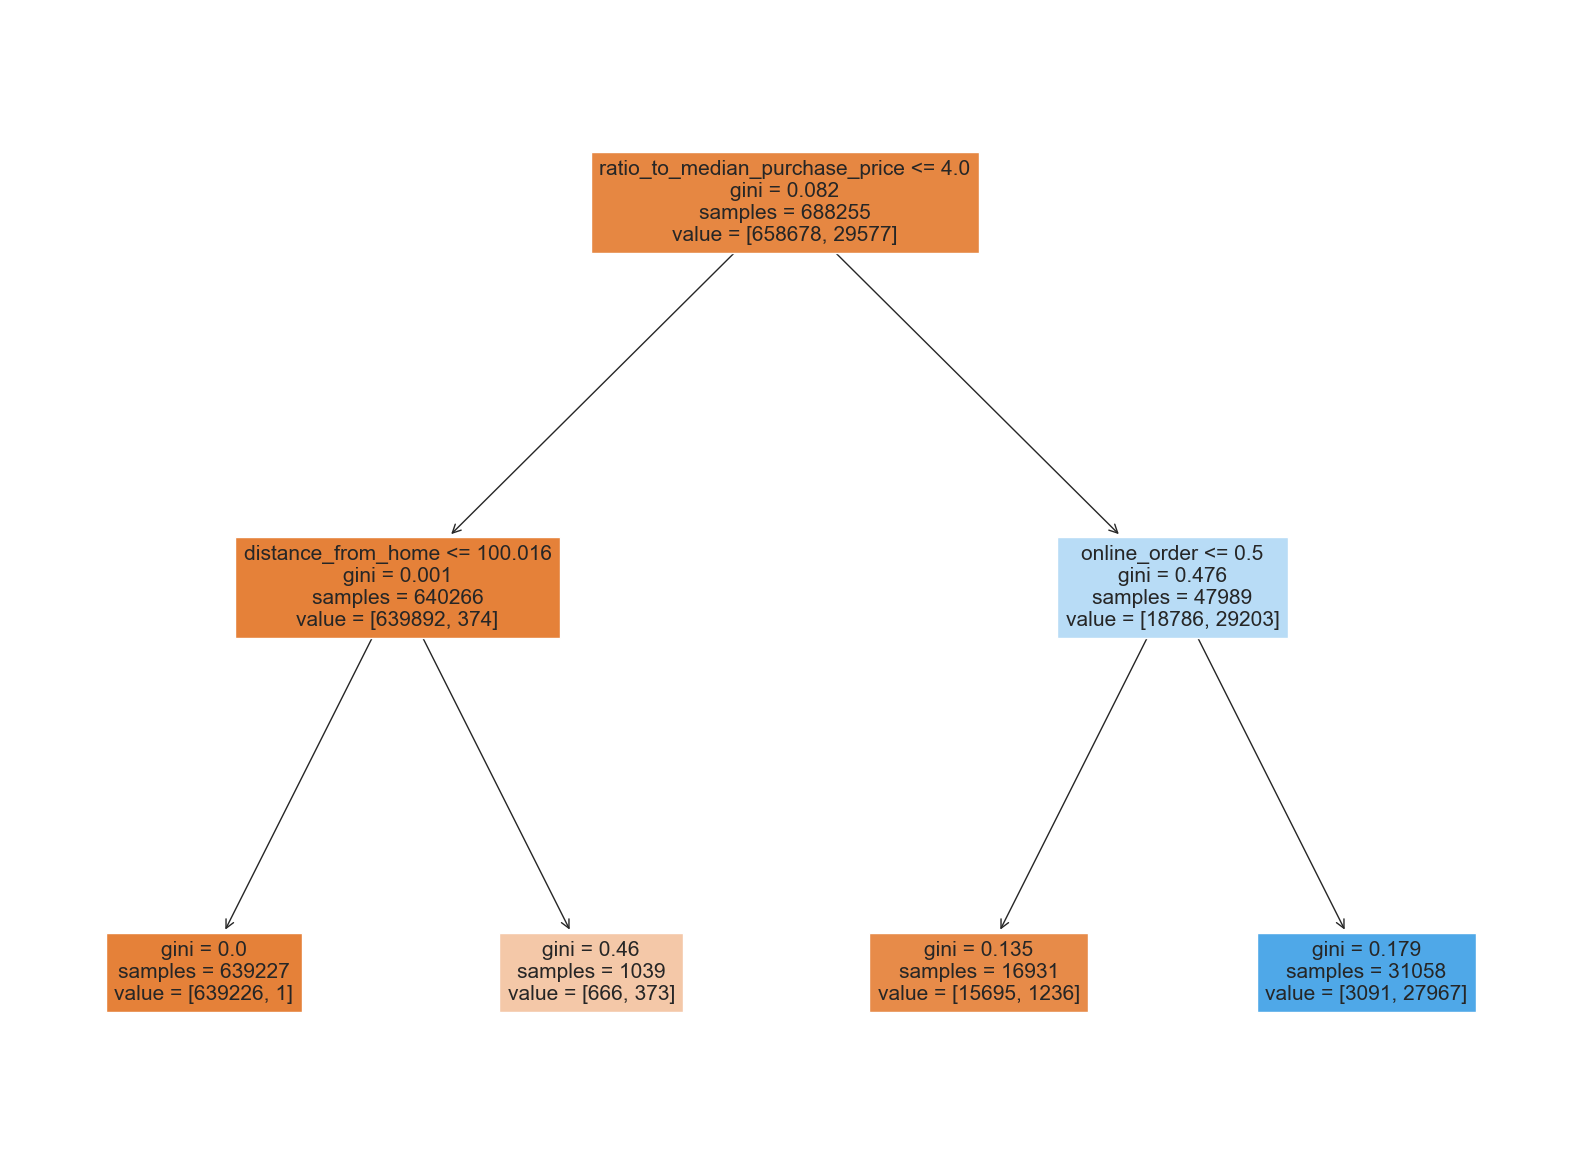

In [46]:
from sklearn.tree import plot_tree

dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_clas_train, y_clas_train)
yhat_clas = dtree.predict(X_clas_test)

fig_clas = plt.figure(figsize=(20,15))
DT_plot = plot_tree(dtree, feature_names=X_clas_train.columns.tolist(), filled=True)

In [47]:
fig_clas.savefig("DT_plot_classification.png")

### Fitting Decision Tree classifier

In [48]:
X = data_classification[['online_order', 'ratio_to_median_purchase_price']]
y = data_classification[['fraud']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [49]:
# Масштабирование функций: масштабировать функции необходимо только для целей визуализации.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [50]:
dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train.values.reshape(-1,))
y_hat_vis = dtree.predict(X_test)

C:\Users\Capybaras\AppData\Local\Temp\ipykernel_12680\3851114481.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


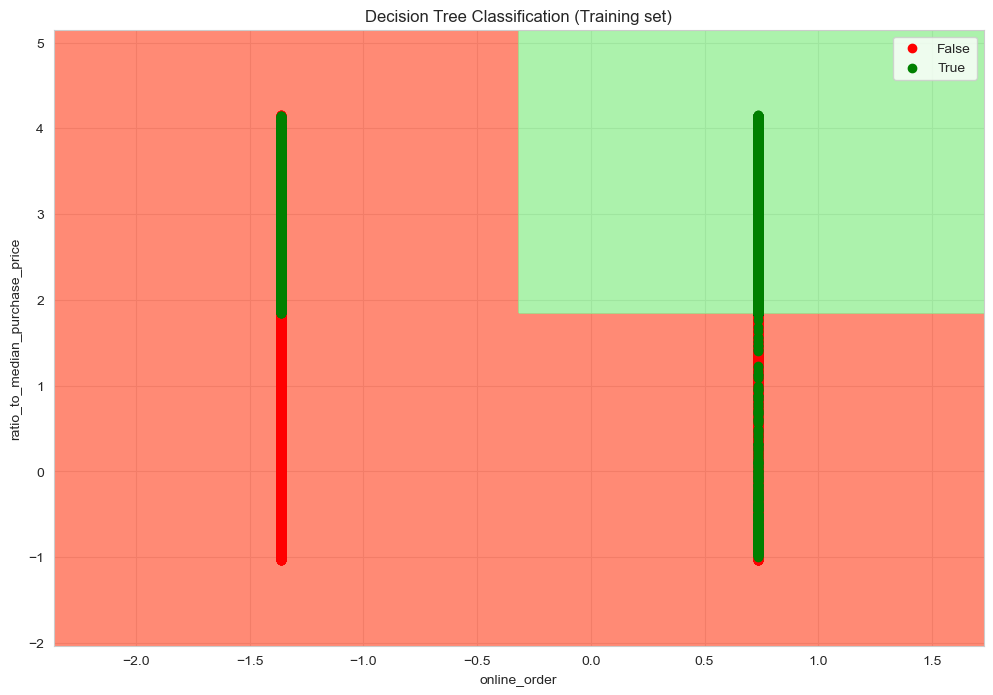

In [51]:
# visualization
plt.figure(figsize=(12,8))

X_set, y_set = X_train, y_train.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


from matplotlib.colors import ListedColormap
plt.contourf( X1, X2 , dtree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('online_order')
plt.ylabel('ratio_to_median_purchase_price')
plt.legend()
plt.show()

C:\Users\Capybaras\AppData\Local\Temp\ipykernel_12680\1464812564.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


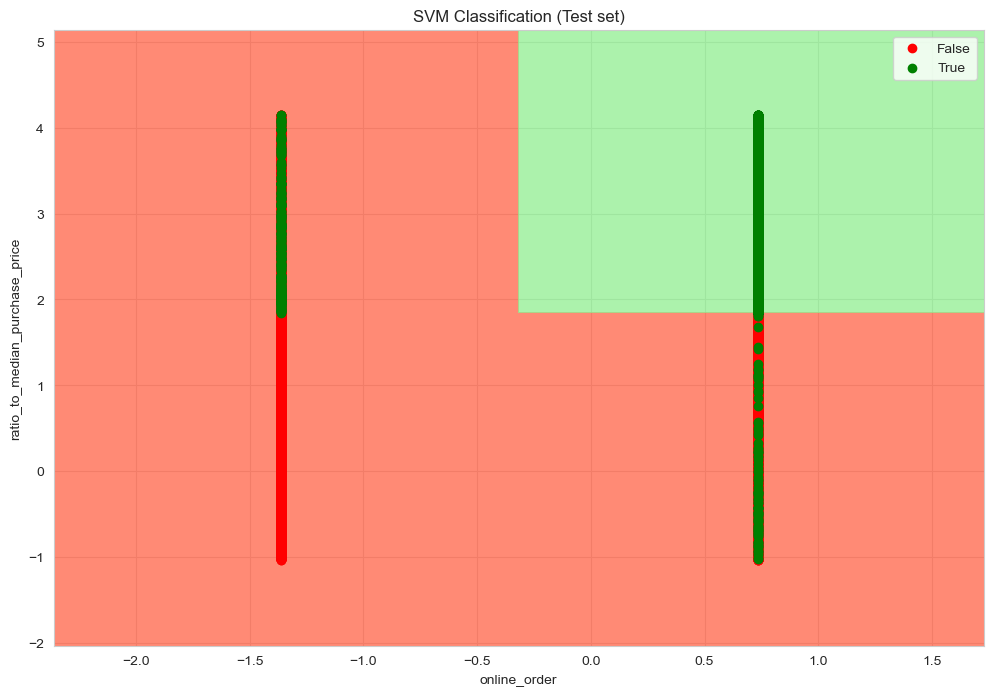

In [52]:
plt.figure(figsize=(12,8))

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dtree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Classification (Test set)')
plt.xlabel('online_order')
plt.ylabel('ratio_to_median_purchase_price')
plt.legend()
plt.show()

# Pycaret

In [53]:
df_py = pd.read_csv('./data/pred_data_lab_4.csv')
df_py.head()
from pycaret.classification import *

setup(data=df_py, target='fraud', session_id=555, train_size=0.7, preprocess=True)

In [54]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [55]:
dt = create_model(estimator='dt')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:34:44
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [56]:
tuned_dt = tune_model(dt)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:34:51
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Decision Trees Regression

In [57]:
y_reg = data_regression['carat']
X_reg = data_regression.drop('carat', axis=1)

from sklearn.model_selection import train_test_split
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=rand_state)

X_reg_train.head()

,cut,color,clarity,depth,table,price,x,y,z
11993,4,5,2,61.7,57.0,5439,6.44,6.49,3.99
36802,4,6,5,61.6,56.0,1547,4.79,4.82,2.96
29966,2,5,4,61.9,54.0,932,4.77,4.82,2.96
32669,4,0,5,61.7,57.0,1071,4.32,4.34,2.67
10790,4,5,1,60.1,59.0,5111,6.60,6.57,3.96


In [58]:
from sklearn.tree import DecisionTreeRegressor

# Fitting regression tree to the Training set
Tree_regressor = DecisionTreeRegressor()
Tree_regressor.fit(X_reg_train, y_reg_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')

In [59]:
y_reg_hat = Tree_regressor.predict(X_reg_test)

predictions = pd.DataFrame({ 'y_test':y_reg_test,'y_hat':y_reg_hat})
predictions.head()

,y_test,y_hat
11066,1.03,1.03
13709,1.00,1.03
24193,0.30,0.30
38193,0.50,0.51
34831,0.50,0.50


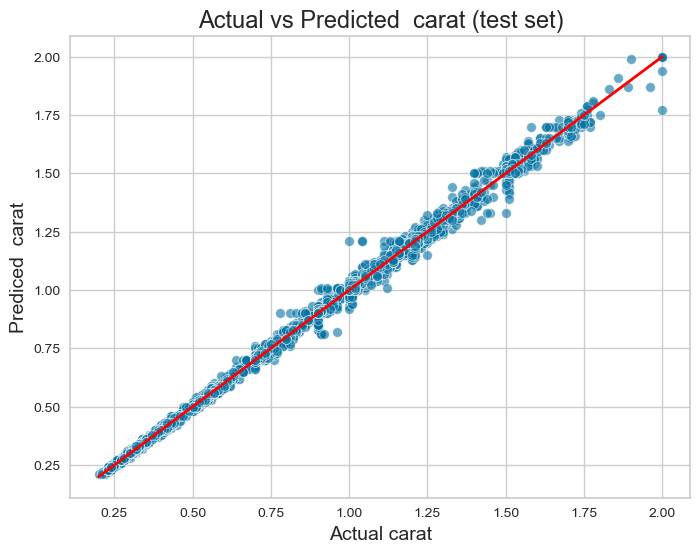

In [60]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_reg_test, y=y_reg_hat, alpha=0.6)
sns.lineplot(x=y_reg_test, y=y_reg_test, color='red', linewidth=2)
plt.xlabel('Actual carat', fontsize=14)
plt.ylabel('Prediced  carat', fontsize=14)
plt.title('Actual vs Predicted  carat (test set)', fontsize=17)
plt.show()

In [61]:
MSE_reg_test = round(np.mean(np.square(y_reg_test - y_reg_hat)),2)
RMSE_reg_test = round(np.sqrt(MSE_reg_test),2)
RMSE_reg_test

0.0

## Визуализация Tree

In [62]:
data_regression.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [63]:
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_reg_train, y_reg_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')

In [64]:
carat_hat = dtree_reg.predict(X_reg_test)

from sklearn import tree

#fig = plt.figure(figsize=(15,10))
#DT_plot = tree.plot_tree(dtree_reg, feature_names=X_reg_train.columns.tolist(), filled=True)

In [65]:
#plt.figure(figsize=(10,6))
#sns.scatterplot(x='table', y='price', data=data_regression, hue='carat')
#plt.show()

In [66]:
dtree_reg = DecisionTreeRegressor(max_depth=1)
dtree_reg.fit(X_reg_train[['price']], y_reg_train)
carat_hat = dtree_reg.predict(X_reg_test[['price']])

In [67]:
#sns.scatterplot(x=X_reg_test['price'], y=y_reg_test, color='red')
#sns.lineplot(x=X_reg_test['price'], y=carat_hat)
#plt.show()

In [68]:
dtree_reg.score(np.array(X_reg_test['price']).reshape(-1,1),y_reg_test)

0.7237867901008003

# Pycaret

In [69]:
df = pd.read_csv("./data/pred_data_lab_3.csv")
df_py = df.copy()
df_py.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,4,0,0,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,3,0,1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.29,3,1,2,62.4,58.0,334,4.20,4.23,2.63
3,4,0.31,1,2,0,63.3,58.0,335,4.34,4.35,2.75
4,5,0.24,2,2,4,62.8,57.0,336,3.94,3.96,2.48


In [70]:
from pycaret.regression import *

setup(data=df_py,  target='carat', session_id=555, train_size=0.7, preprocess=True)

In [71]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [72]:
dt_reg = create_model(estimator='dt')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:35:14
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [73]:
tuned_dt_reg = tune_model(dt_reg)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:35:14
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Задача 2. Ансамбли

## Bagging

In [74]:
import sklearn.ensemble as ensemble

bagging_regression_model = ensemble.BaggingRegressor().fit(X_reg_train, y_reg_train)

bagging_regression_prediction = bagging_regression_model.predict(X_reg_test)

In [75]:
import sklearn.metrics as metrics

print(metrics.mean_absolute_error(y_reg_test, bagging_regression_prediction),
      metrics.r2_score(y_reg_test, bagging_regression_prediction),
      sep="\n")

0.006386594005449601
0.9991583316479293


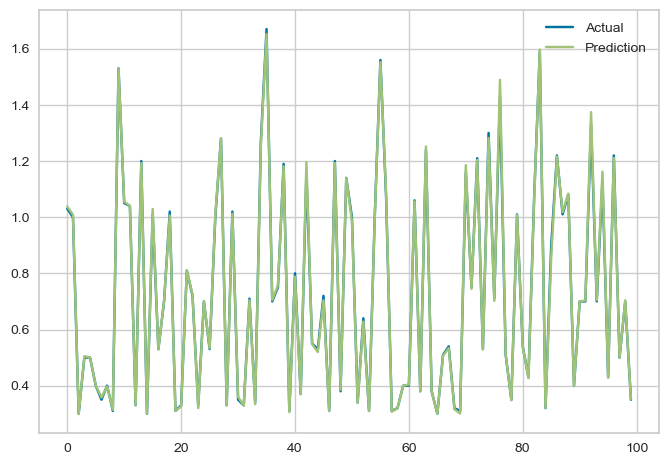

In [76]:
plt.plot(y_reg_test.to_numpy()[:100], label="Actual")
plt.plot(bagging_regression_prediction[:100], label="Prediction")
plt.legend()

In [77]:
bagging_classification_model = ensemble.BaggingClassifier().fit(X_clas_train, y_clas_train)

bagging_classification_prediction = bagging_classification_model.predict(X_clas_test)

In [78]:
print(metrics.classification_report(y_clas_test, bagging_classification_prediction))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    164666
        True       1.00      1.00      1.00      7398

    accuracy                           1.00    172064
   macro avg       1.00      1.00      1.00    172064
weighted avg       1.00      1.00      1.00    172064


## Boosting

In [79]:
boosting_regression_model = ensemble.GradientBoostingRegressor().fit(X_reg_train, y_reg_train)

boosting_regression_prediction = boosting_regression_model.predict(X_reg_test)

In [80]:
print(metrics.mean_absolute_error(y_reg_test, boosting_regression_prediction),
      metrics.r2_score(y_reg_test, boosting_regression_prediction),
      sep="\n")

0.00787919735309767
0.9989287272686427


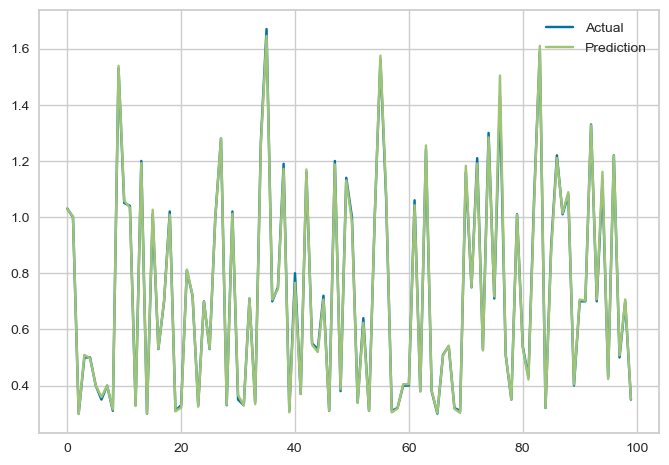

In [81]:
plt.plot(y_reg_test.to_numpy()[:100], label="Actual")
plt.plot(boosting_regression_prediction[:100], label="Prediction")
plt.legend()

In [82]:
boosting_classification_model = ensemble.GradientBoostingClassifier().fit(X_clas_train, y_clas_train)

boosting_classification_prediction = boosting_classification_model.predict(X_clas_test)

In [83]:
print(metrics.classification_report(y_clas_test, bagging_classification_prediction))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    164666
        True       1.00      1.00      1.00      7398

    accuracy                           1.00    172064
   macro avg       1.00      1.00      1.00    172064
weighted avg       1.00      1.00      1.00    172064


## Stacking

In [84]:
import sklearn.linear_model as linear

stacking_regression_model = ensemble.StackingRegressor(cv=3, estimators=[("ridge", linear.RidgeCV()), ("tree", tree.DecisionTreeRegressor())]).fit(X_reg_train, y_reg_train)

stacking_regression_prediction = stacking_regression_model.predict(X_reg_test)

In [85]:
print(metrics.mean_absolute_error(y_reg_test, bagging_regression_prediction),
      metrics.r2_score(y_reg_test, bagging_regression_prediction),
      sep="\n")

0.006386594005449601
0.9991583316479293


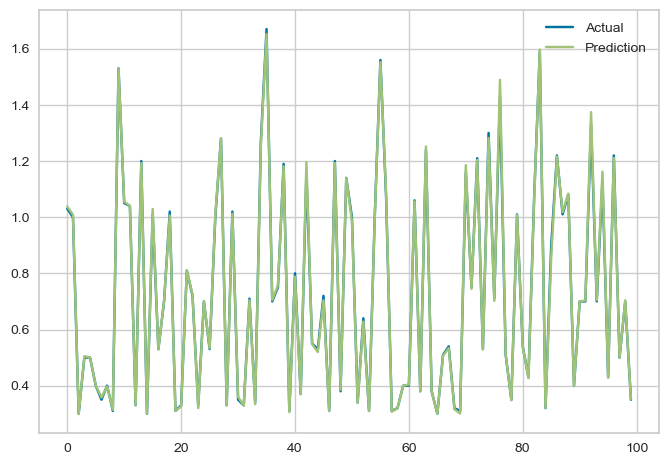

In [86]:
plt.plot(y_reg_test.to_numpy()[:100], label="Actual")
plt.plot(bagging_regression_prediction[:100], label="Prediction")
plt.legend()

In [87]:
import sklearn.neighbors as neighbors

stacking_classification_model = ensemble.StackingClassifier(cv=3, estimators=[("neighbors", neighbors.KNeighborsClassifier(weights="distance")), ("tree", tree.DecisionTreeClassifier())]).fit(X_clas_train, y_clas_train)

stacking_classification_prediction = stacking_classification_model.predict(X_clas_test)

In [88]:
print(metrics.classification_report(y_clas_test, stacking_classification_prediction))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    164666
        True       1.00      1.00      1.00      7398

    accuracy                           1.00    172064
   macro avg       1.00      1.00      1.00    172064
weighted avg       1.00      1.00      1.00    172064


# Задание 3